## 1. Downloading data

In [152]:
# Import necessary modules
import os  # Operating system module for file and directory operations
import tarfile  # Module for working with tar archives
import urllib.request  # Module for opening and reading URLs

# Define a function to fetch data
def fetch_data(data_url, data_path):
    os.makedirs(data_path, exist_ok=True) # Create the local directory if it doesn't exist
    tgz_path = os.path.join(data_path, "housing.tgz") # Construct the full path for the downloaded tar file
    urllib.request.urlretrieve(data_url, tgz_path) # Download the tar file from the specified URL and save it locally
    housing_tgz = tarfile.open(tgz_path) # Open the downloaded tar file
    housing_tgz.extractall(path=data_path) # Extract all contents from the tar file to the specified directory
    housing_tgz.close()  # Close the tar file

# Call the function to fetch housing data
if __name__=="__main__":
    data_PATH = os.path.join("datasets", "housing") # Define the local path where the dataset will be stored
    data_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" # Define the complete URL of the dataset
    fetch_data(data_URL, data_PATH)

## 2. Loading and examining data

In [153]:
import pandas as pd

data_PATH = os.path.join("datasets", "housing") # Define the local path where the housing dataset will be stored

def load_data(housing_path=data_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

* __Take a quick look at the data (using head method)__

In [154]:
data = load_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* __Get a quick description of data (using info method)__

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* __Finding out categories exist and the number of districts belong to each category (using the value_counts() method)__

In [156]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

* __Showing a summary of the numerical attributes ( using describe() method )__

In [157]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Visualizing the data

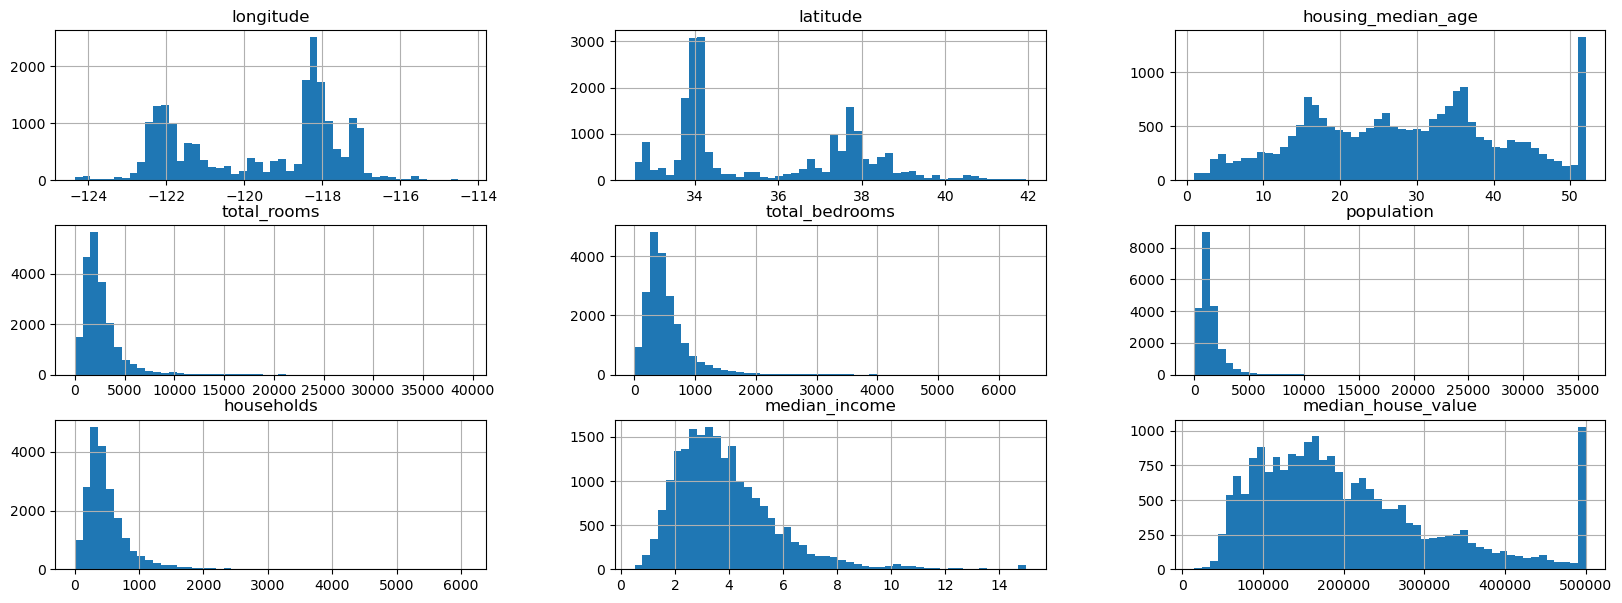

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,7))
plt.show()

## 4. Splitting data

* __Basic data splitter based on randomness__

In [159]:
import numpy as np

np.random.seed(42) # to make this script's output identical at every run

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Shuffle the indices randomly to create a random order
    test_set_size = int(len(data) * test_ratio) # Calculate the size of the test set based on the specified ratio
    test_indices = shuffled_indices[:test_set_size] # Select the first 'test_set_size' indices for the test set
    train_indices = shuffled_indices[test_set_size:] # Select the remaining indices for the training set
    return data.iloc[train_indices], data.iloc[test_indices] # Return the subsets of the data using the selected indices

if __name__ == "__main__":
    train_set, test_set = split_train_test(data, 0.2)
    print("The total number of train set = ",len(train_set))
    print("The total number of test set = ",len(test_set))

The total number of train set =  16512
The total number of test set =  4128


* __Accurate data splitter using unique identifiers__

In [160]:
import numpy as np
from zlib import crc32

def test_set_check(identifier, test_ratio):
    # Calculate CRC32 hash of the 64-bit integer representation of the identifier
    # and ensure it's a 32-bit unsigned integer using bitwise AND operation
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column] # Extract identifiers from the specified column in the dataset
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # Apply the test_set_check function to each identifier
    return data.loc[~in_test_set], data.loc[in_test_set] # Return the training set (not in the test set) and the test set

if __name__ == "__main__":
    id = 'id'
    if id == 'index':
        data_with_id = data.reset_index()   # adds an `index` column
        train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")
    elif id == 'id':
        data_with_id = data.copy()
        data_with_id["id"] = data["longitude"] * 1000 + data["latitude"]
        train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "id")

    print("The total number of train set = ",len(train_set))
    print("The total number of test set = ",len(test_set))
    # print(train_set.head())

The total number of train set =  16322
The total number of test set =  4318


* __Simple data splitter using _sklearn.model_selection_ (purely random sampling methods)__

In [161]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


* __Stratified splitter using _sklearn.model_selection_ (Stratified shuffle split of a dataset )__

    - Stratified split is ensuring that both your training and testing groups represent the different types in your data fairly. It's like making sure you don't have all the high earners in one group and low earners in the other.
    - In this example, the pd.cut() function in Pandas is utilized to convert continuous data into discrete intervals, commonly known as bins.
    - By employing this approach, we can guarantee that a reasonable proportion of data in each category is present in both the test and training sets, ensuring that the training and   test sets are representative of all categories.

    


In [164]:
# Create an income category attribute based on median income
data["income_cat"] = pd.cut(data["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

## Plot a histogram of the income categories
# data["income_cat"].hist()

# Use StratifiedShuffleSplit to ensure proportional representation of income categories in train and test sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into training and testing sets based on income categories
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Display the income category proportions in the stratified test set
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set),data["income_cat"].value_counts() / len(data))

# Display the income category proportions in the overall dataset
print(data["income_cat"].value_counts() / len(data))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64 income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
